In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sequential


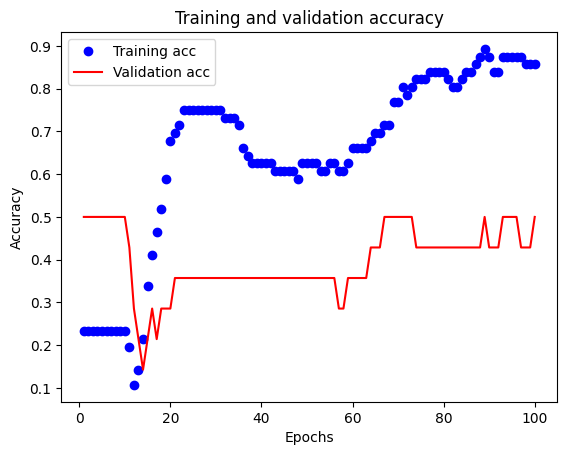

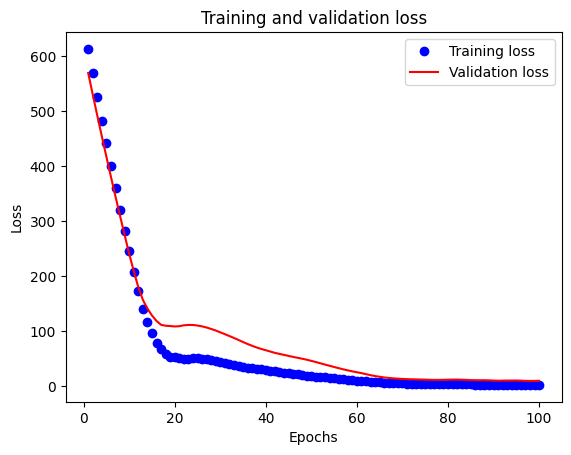

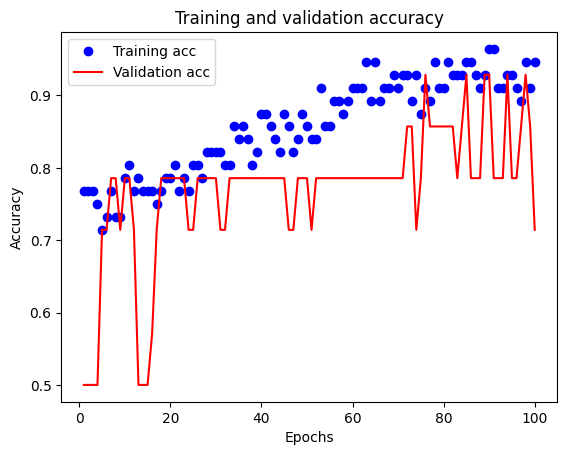

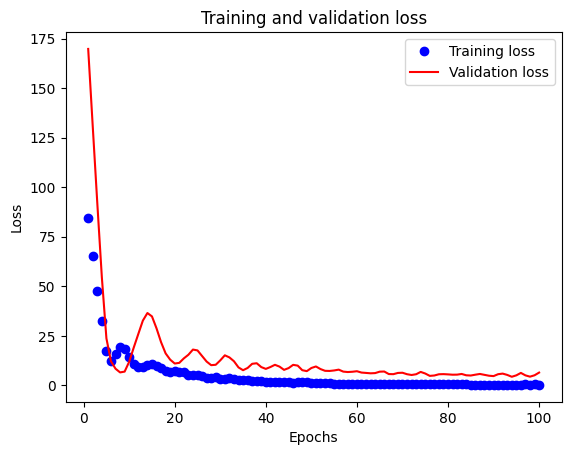

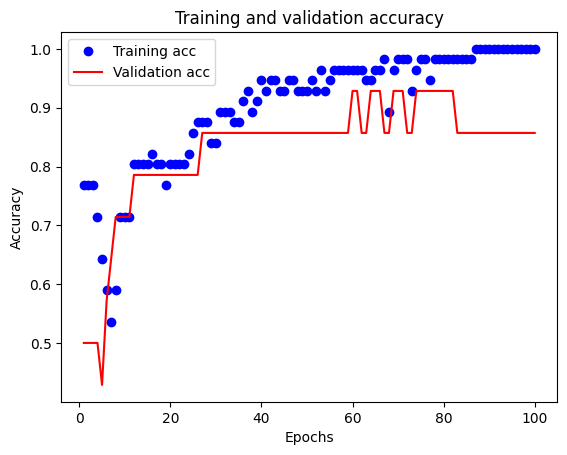

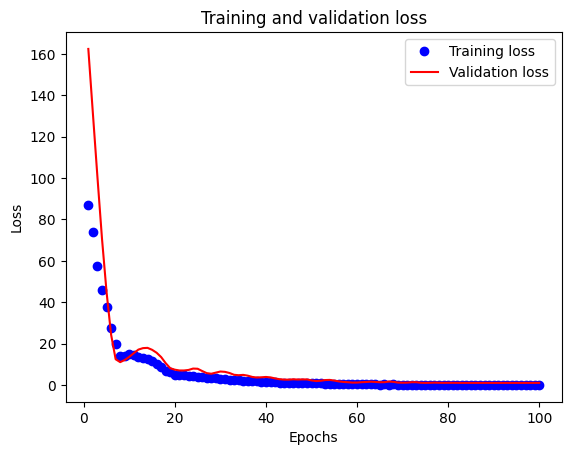

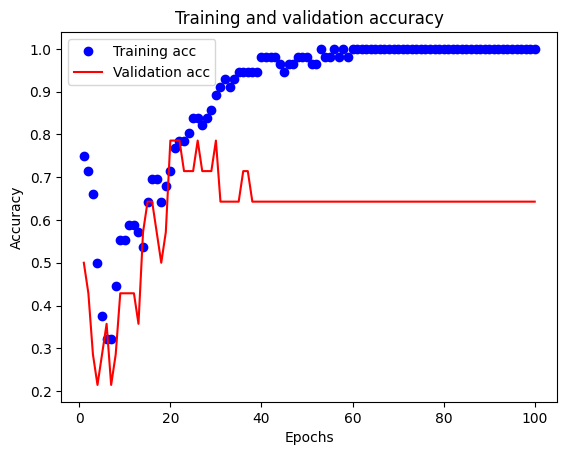

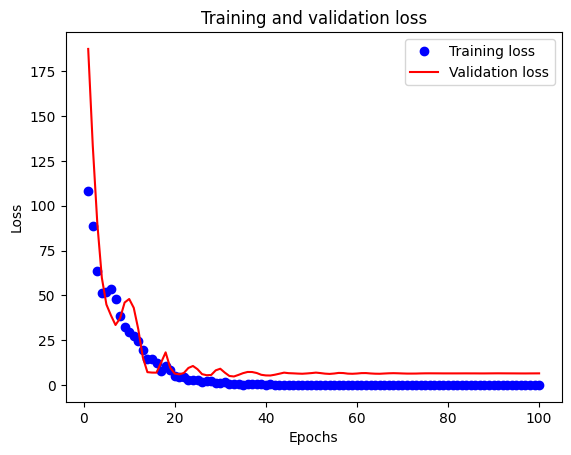

In [9]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

file='/content/drive/My Drive/UGP23/Features/Training'
# Define the path to the folder containing the CSV files
data_folder_path = "/content/drive/My Drive/UGP23/Features3"

# Define the path to the training and testing folders
training_folder_path = os.path.join(data_folder_path, "Training")
testing_folder_path = os.path.join(data_folder_path, "Testing")

# Define the IDs for the CSV files to be processed
csv_file_ids = [str(i).zfill(3) for i in range(1, 5)]

# Define the hyperparameters for the neural network
input_dim = 25
output_dim = 1
hidden_dim = 50
learning_rate = 0.01
num_epochs = 100

# Define the TensorFlow model
accuracylist=[]
losslist=[]
for csv_file_id in csv_file_ids:
    model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(hidden_dim, activation="relu"),
    tf.keras.layers.Dense(output_dim, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
    
    # Step 1: Read the training CSV file and split into features and labels
    training_csv_file_path = os.path.join(training_folder_path, "Training1" + csv_file_id + ".csv")
    df = pd.read_csv(training_csv_file_path, header=None,skiprows=1)
    df = df.astype('float32')
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    
    # Step 2: Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 3: Train the model on the training set and plot epoch vs accuracy and epoch vs loss function
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, verbose=0)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    accuracylist.append(val_acc[-1])
    losslist.append(val_loss[-1])
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Step 4: Read the testing CSV file and split into features and labels
    testing_csv_file_path = os.path.join(testing_folder_path, "Testing1" + csv_file_id + ".csv")
    df = pd.read_csv(testing_csv_file_path, header=None,skiprows=1)


LSTM


Epoch 1/50
3/3 [==============================] - 6s 525ms/step - loss: 0.6581 - accuracy: 0.5429 - val_loss: 0.5706 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 53ms/step - loss: 0.6324 - accuracy: 0.7143 - val_loss: 0.5752 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 55ms/step - loss: 0.6171 - accuracy: 0.7143 - val_loss: 0.5617 - val_accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 0s 56ms/step - loss: 0.6282 - accuracy: 0.7143 - val_loss: 0.5567 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 0s 58ms/step - loss: 0.5897 - accuracy: 0.7143 - val_loss: 0.5563 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 0s 57ms/step - loss: 0.5965 - accuracy: 0.7143 - val_loss: 0.5589 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 58ms/step - loss: 0.5962 - accuracy: 0.7143 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 8/50
3/3 [==========

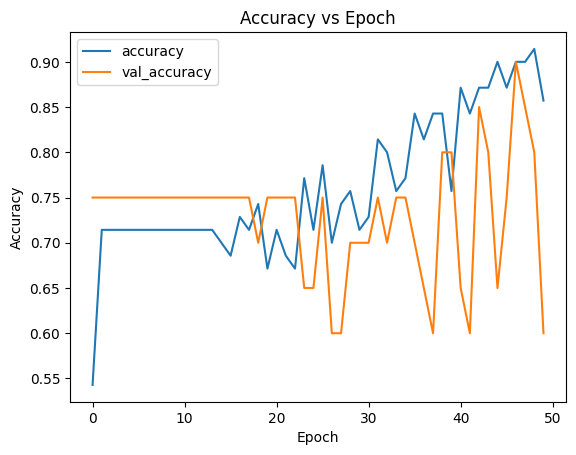

Epoch 1/50
3/3 [==============================] - 6s 532ms/step - loss: 0.6348 - accuracy: 0.6857 - val_loss: 0.5524 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 55ms/step - loss: 0.6033 - accuracy: 0.7143 - val_loss: 0.5480 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 57ms/step - loss: 0.5829 - accuracy: 0.7143 - val_loss: 0.5445 - val_accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 0s 58ms/step - loss: 0.5623 - accuracy: 0.7000 - val_loss: 0.5309 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 0s 56ms/step - loss: 0.5558 - accuracy: 0.7286 - val_loss: 0.4986 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 0s 59ms/step - loss: 0.5638 - accuracy: 0.7143 - val_loss: 0.4673 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 57ms/step - loss: 0.5047 - accuracy: 0.7143 - val_loss: 0.5202 - val_accuracy: 0.8000
Epoch 8/50
3/3 [==========

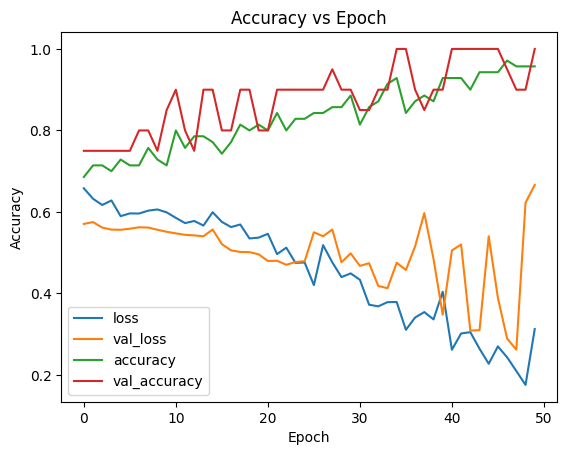

Epoch 1/50
3/3 [==============================] - 6s 794ms/step - loss: 0.7209 - accuracy: 0.4857 - val_loss: 0.5633 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 87ms/step - loss: 0.5928 - accuracy: 0.7143 - val_loss: 0.5679 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 81ms/step - loss: 0.6150 - accuracy: 0.7143 - val_loss: 0.5636 - val_accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 0s 89ms/step - loss: 0.6223 - accuracy: 0.7143 - val_loss: 0.5646 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 0s 93ms/step - loss: 0.5990 - accuracy: 0.7143 - val_loss: 0.5704 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 0s 88ms/step - loss: 0.6200 - accuracy: 0.7143 - val_loss: 0.5691 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 85ms/step - loss: 0.6220 - accuracy: 0.7143 - val_loss: 0.5643 - val_accuracy: 0.7500
Epoch 8/50
3/3 [==========

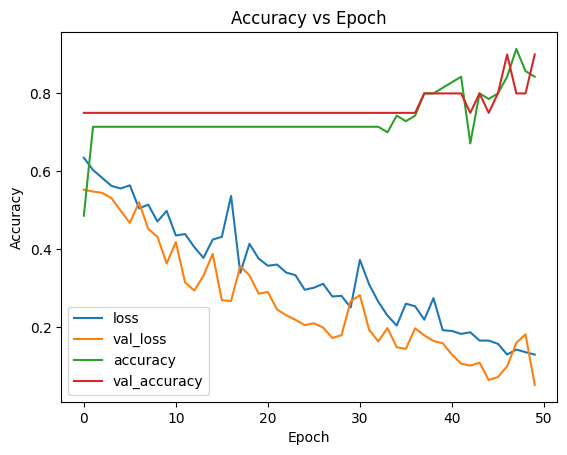

Epoch 1/50
3/3 [==============================] - 6s 526ms/step - loss: 0.6208 - accuracy: 0.6571 - val_loss: 0.5618 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 57ms/step - loss: 0.6119 - accuracy: 0.7143 - val_loss: 0.5578 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 58ms/step - loss: 0.6049 - accuracy: 0.7143 - val_loss: 0.5678 - val_accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 0s 59ms/step - loss: 0.5952 - accuracy: 0.7143 - val_loss: 0.5599 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 0s 66ms/step - loss: 0.5888 - accuracy: 0.7143 - val_loss: 0.5409 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 0s 66ms/step - loss: 0.5793 - accuracy: 0.7143 - val_loss: 0.5313 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 63ms/step - loss: 0.5659 - accuracy: 0.7143 - val_loss: 0.5225 - val_accuracy: 0.7500
Epoch 8/50
3/3 [==========

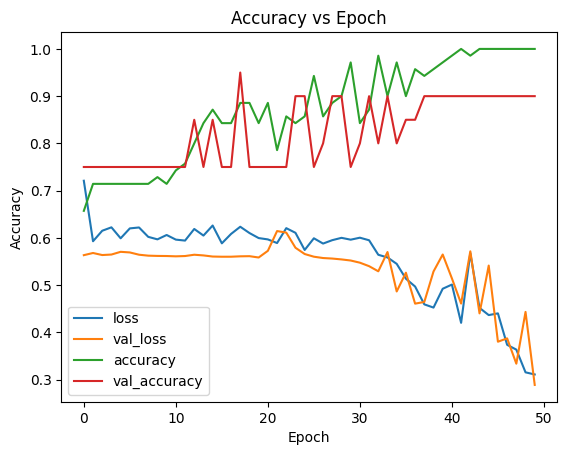

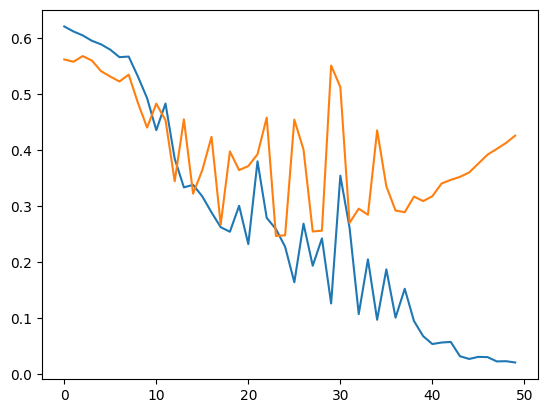

In [11]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Define the path to the folder containing the CSV files
data_folder_path = "/content/drive/My Drive/UGP23/Features3"

# Define the path to the training and testing folders
training_folder_path = os.path.join(data_folder_path, "Training")
testing_folder_path = os.path.join(data_folder_path, "Testing")

# Define the IDs for the CSV files to be processed
csv_file_ids = [str(i).zfill(3) for i in range(1, 5)]
accuracylist = []

# Loop over the CSV file IDs and train a model for each file
for csv_file_id in csv_file_ids:
    # Step 1: Read the training CSV file and split into features and labels
    training_csv_file_path = os.path.join(
        training_folder_path, "Training1" + csv_file_id + ".csv")
    tf = pd.read_csv(training_csv_file_path, header=None, skiprows=1)
    X_train = tf.iloc[:, :-1]  # all columns except the last one
    y_train = tf.iloc[:, -1]
    testing_csv_file_path = os.path.join(
        testing_folder_path, "Testing1" + csv_file_id + ".csv")
    df = pd.read_csv(testing_csv_file_path, header=None, skiprows=1)
    X_test = df.iloc[:, :-1]  # all columns except the last one
    y_test = df.iloc[:, -1]

    # Define RNN model
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile model with binary cross-entropy loss and Adam optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Reshape input data to fit RNN input shape
    X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

    # Evaluate model on test data
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test loss: {loss}, for id {csv_file_id} test accuracy: {accuracy*100}')
    accuracylist.append(accuracy)

    # Plot accuracy vs epoch
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss vs epoch
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
   


random forest
